<a href="https://colab.research.google.com/github/Srirama-Gollanavar/AI_ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (2).zip to archive (2) (6).zip

Extracted Files:
['.config', 'archive (2) (5).zip', 'archive (2).zip', 'archive (2) (4).zip', 'archive (2) (6).zip', 'train.csv', 'archive (2) (2).zip', 'archive (2) (1).zip', 'archive (2) (3).zip', 'sample_data']

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare C

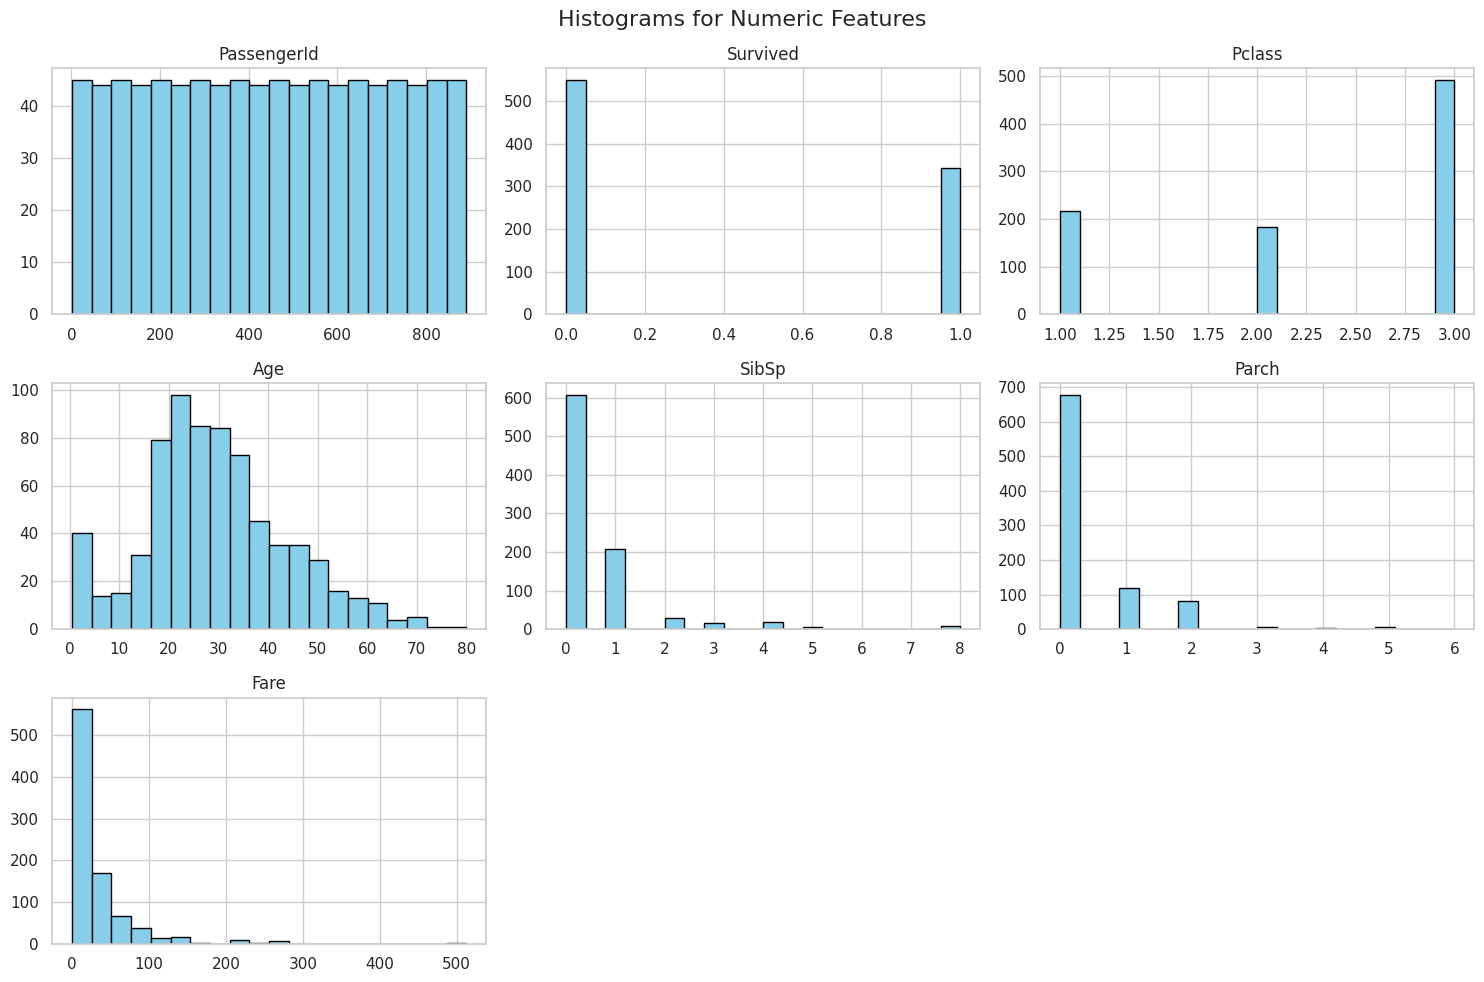

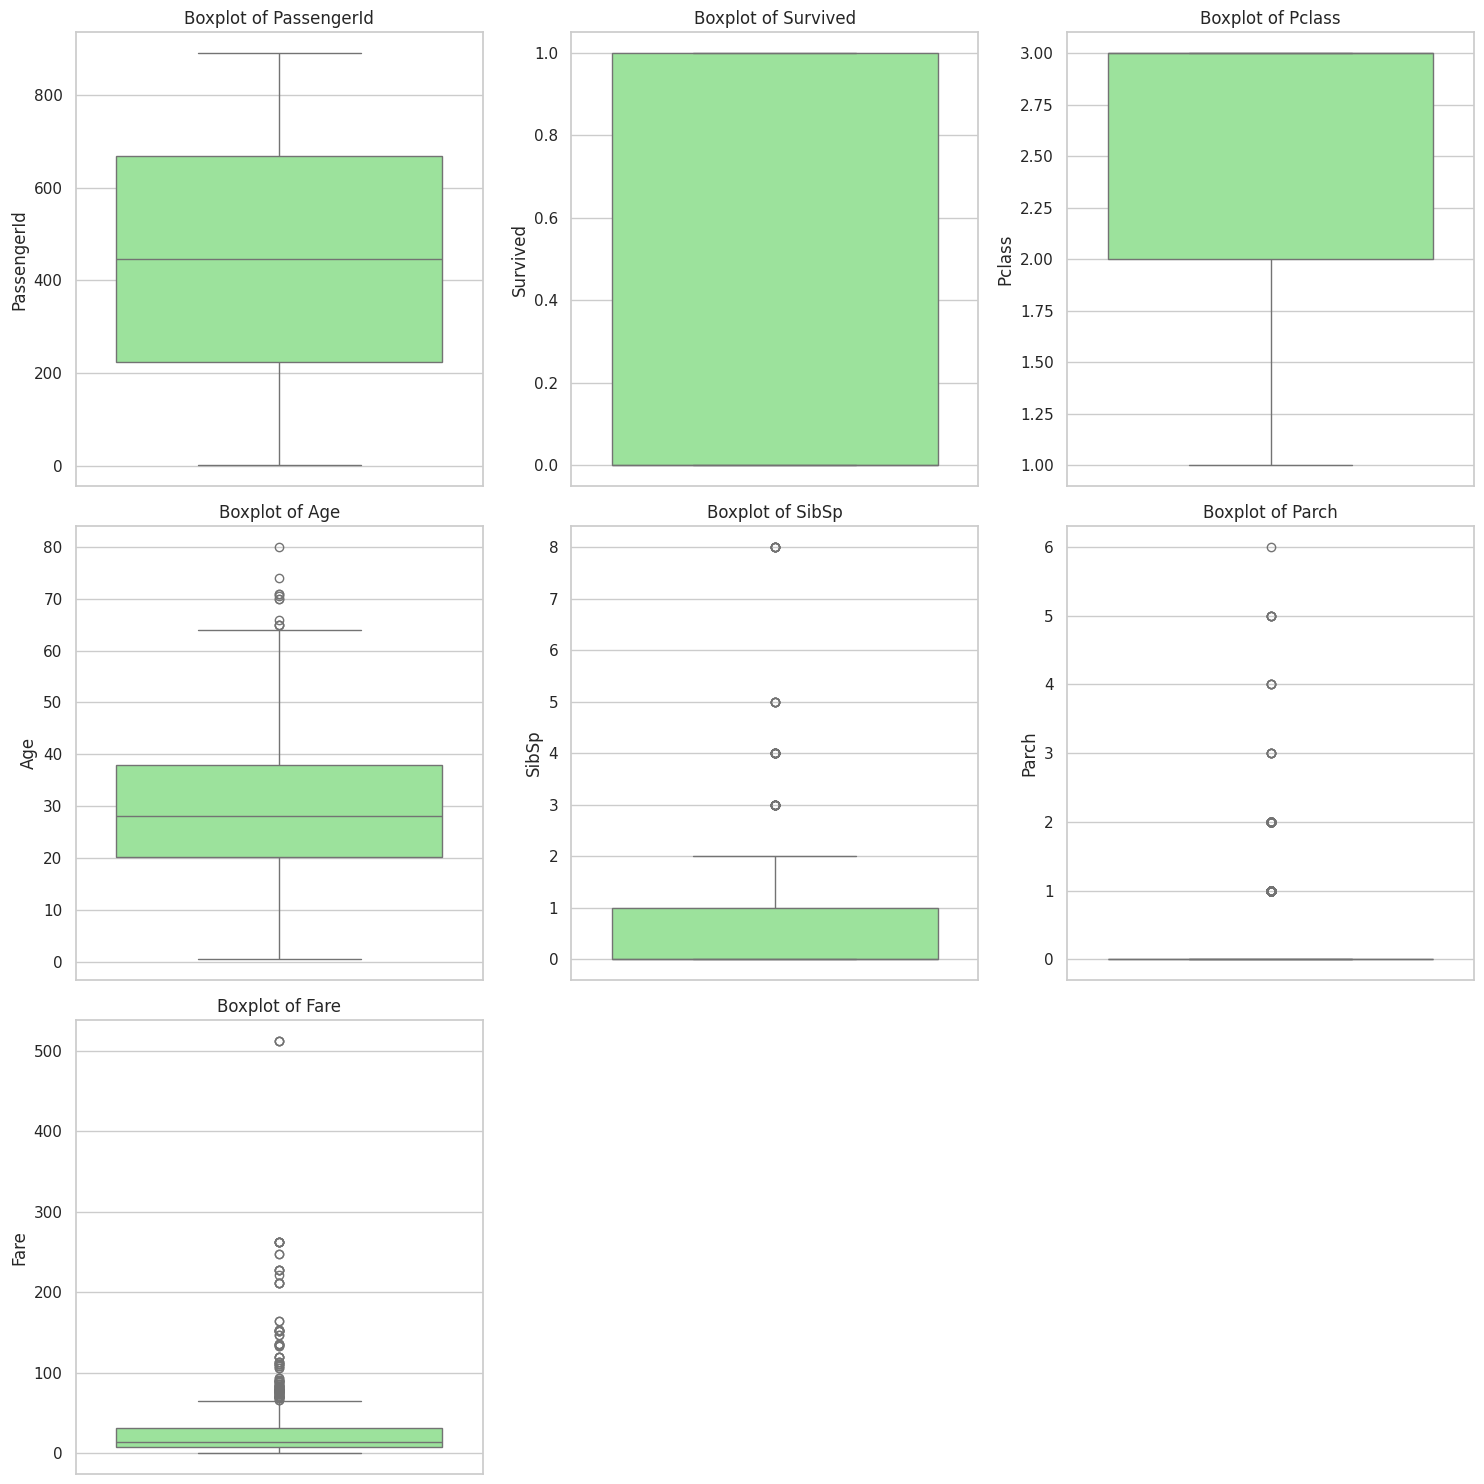

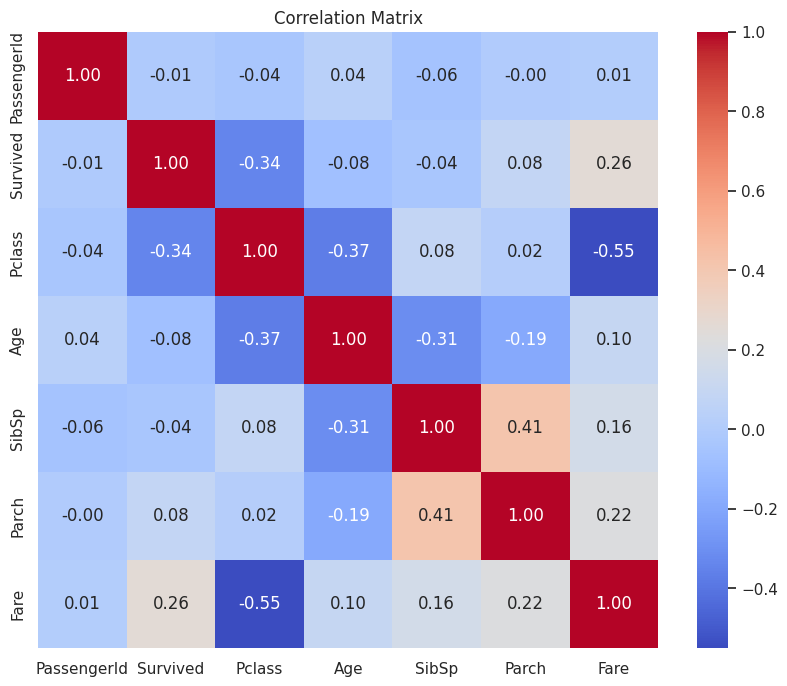

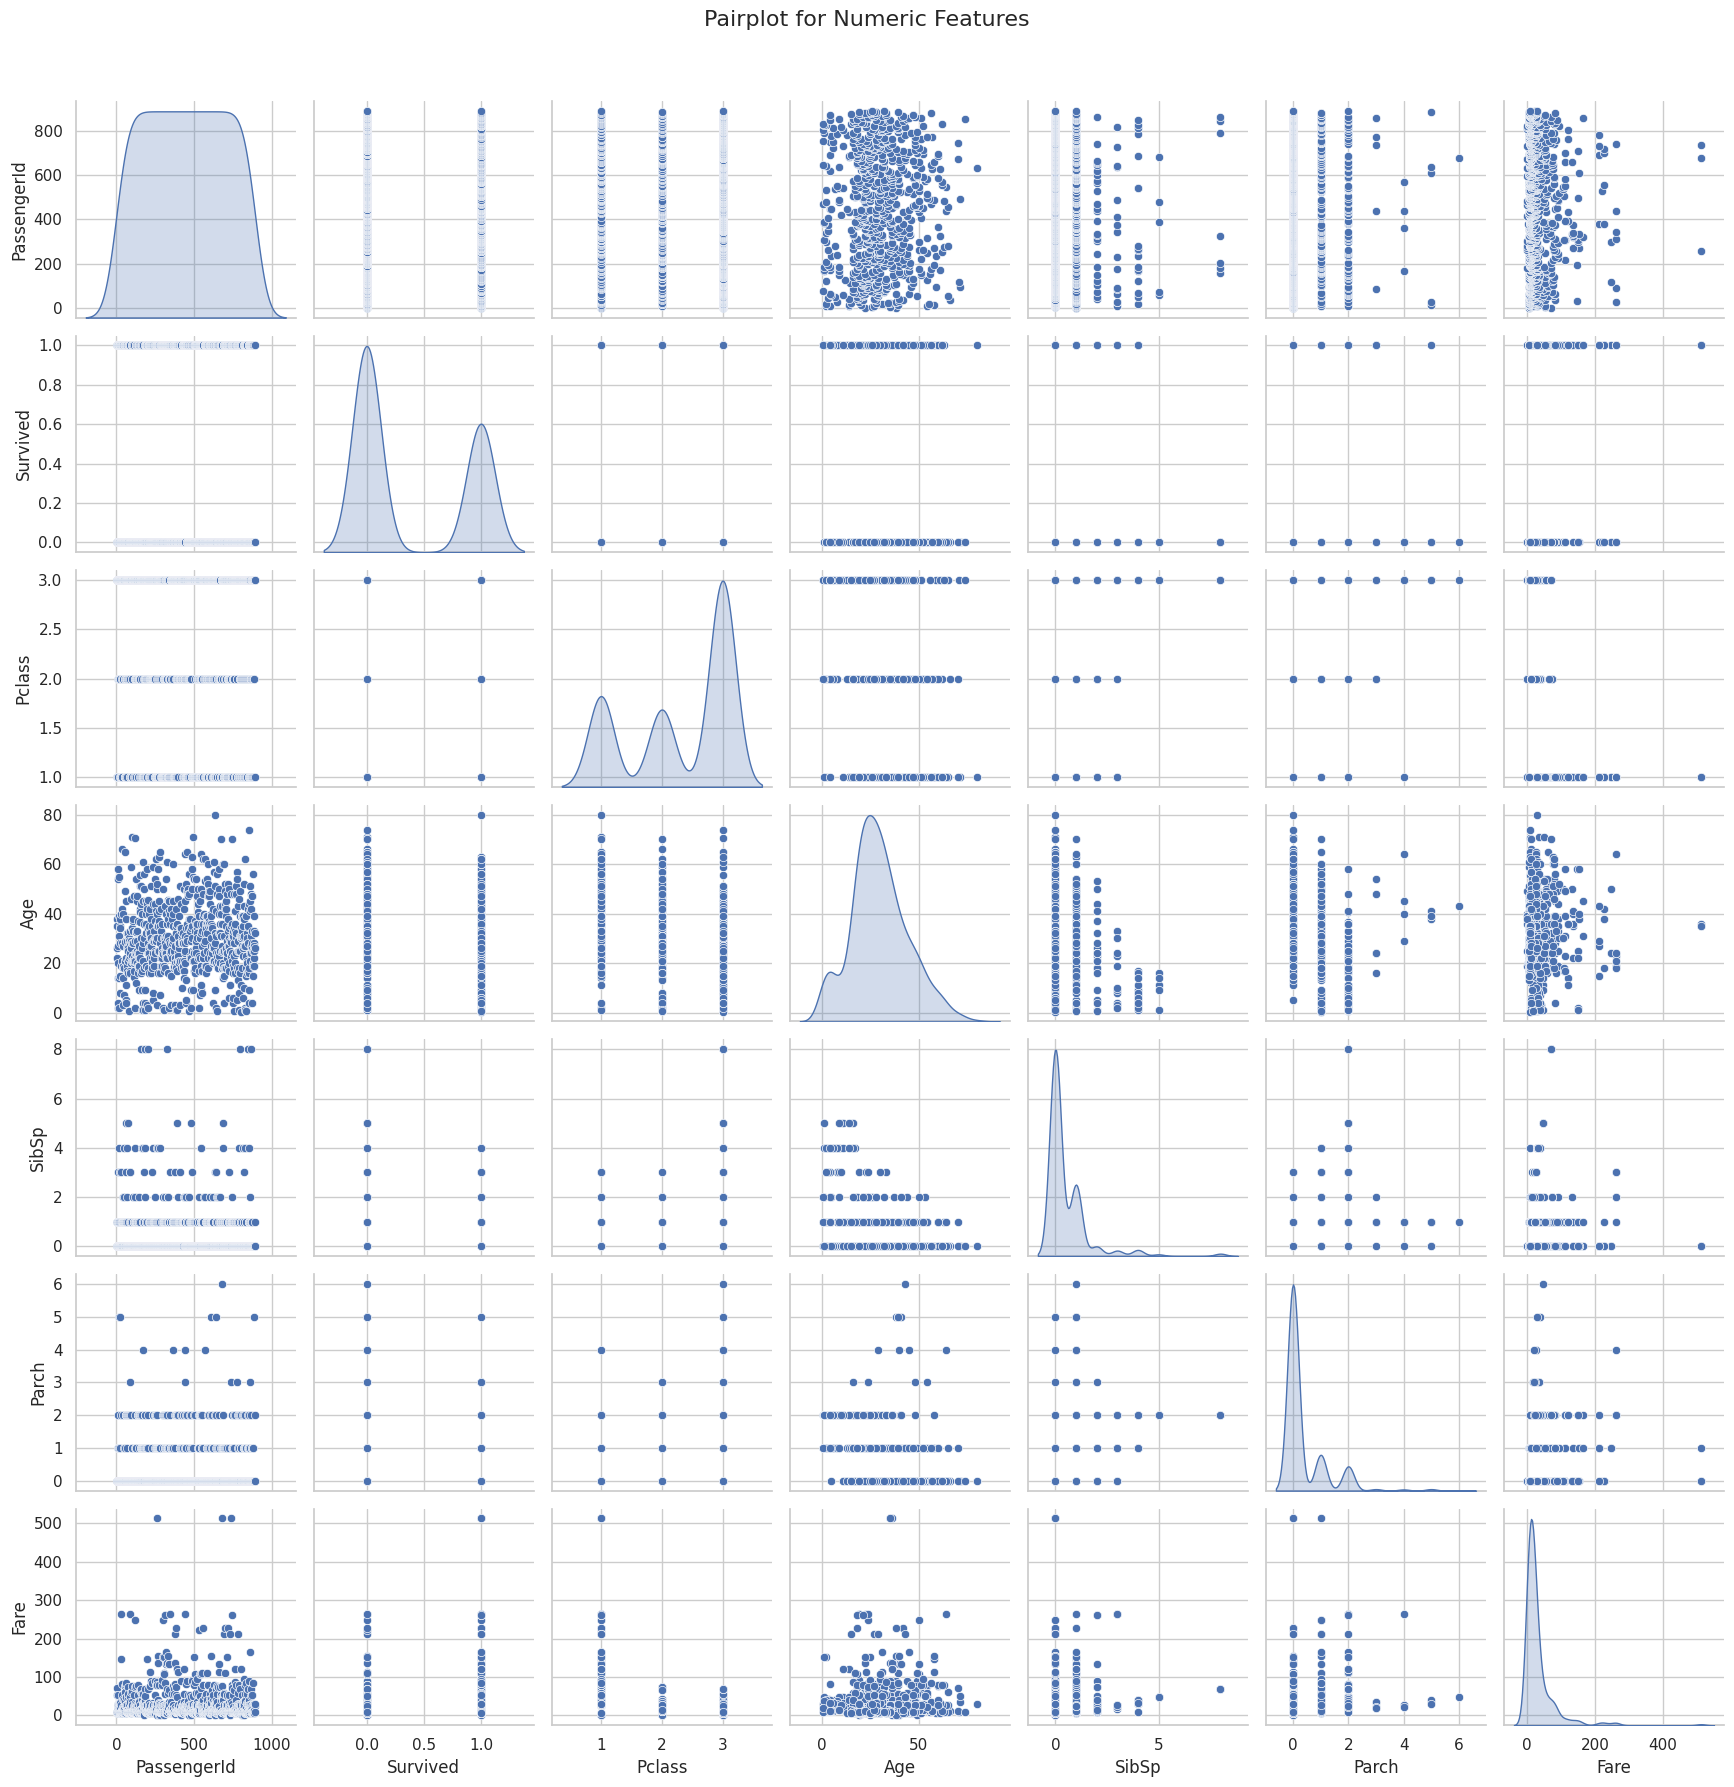


--- Skewness of Numeric Features ---
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

--- Feature Level Inference Example ---
1. Age and Fare have outliers (visible in boxplots).
2. Fare is right-skewed (from histogram & skewness).
3. Pclass and Fare show negative correlation (from heatmap).
4. Missing values exist in Age, Cabin, and Embarked columns (from isnull result).


In [14]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import math

from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall("/content")  # Extract to /content


print("\nExtracted Files:")
print(os.listdir("/content"))


df = pd.read_csv('/content/train.csv')
print("\n--- First 5 Rows ---")
print(df.head())

#Basic Dataset Info
sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Descriptive Statistics ---")
print(df.describe())

# Histograms for Numeric Features
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

#Boxplots for Numeric Features (Dynamic Grid)
num_cols = len(numeric_cols)
rows = math.ceil(num_cols / 3)
plt.figure(figsize=(15, 5 * rows))

for idx, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, idx + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#Correlation Matrix & Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Pairplot
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle('Pairplot for Numeric Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#Skewness Check
print("\n--- Skewness of Numeric Features ---")
print(df[numeric_cols].skew())

#Feature-level Inference Example
print("\n--- Feature Level Inference Example ---")
print("1. Age and Fare have outliers (visible in boxplots).")
print("2. Fare is right-skewed (from histogram & skewness).")
print("3. Pclass and Fare show negative correlation (from heatmap).")
print("4. Missing values exist in Age, Cabin, and Embarked columns (from isnull result).")
